# Chromatin Accessibility Compare

`summarise()` has grouped output by 'tissue1'. You can override using the `.groups` argument.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



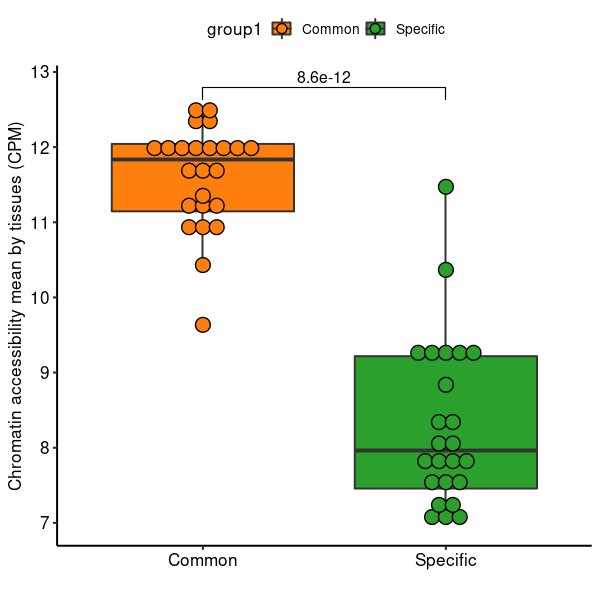

In [51]:
nip <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/100_NIP.bed")
nip$peak <- sprintf("chr%s:%s-%s", nip$V1, nip$V2, nip$V3)
nip_quant <- readRDS("/public/workspace202011/encode/zhutao/analysis/df/NIP_ATAC_all_tissues_norm_quant_nonumi.rds")
library(data.table)
nip_specific_quant<- nip_quant[rownames(nip_quant) %in% nip$peak, ]
nip_specific_quant$peak <- rownames(nip_specific_quant)
nip_specific_quant_long <- melt(setDT(nip_specific_quant), id.vars = c("peak"), variable.name = "tissue")
nip_specific_quant_long$group <- "NIP specific"
common <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/111_NIP_MH63_ZS97.bed")
common$peak <- sprintf("chr%s:%s-%s", common$V1, common$V2, common$V3)
common_quant <- nip_quant[rownames(nip_quant) %in% common$peak, ]
common_quant$peak <- rownames(common_quant)
library(data.table)
common_quant_long <- melt(setDT(common_quant), id.vars = c("peak"), variable.name = "tissue")
common_quant_long$group <- "Common"
df <- rbind(common_quant_long, nip_specific_quant_long)
df$tissue <- gsub("NIP_", "", df$variable)
## MH63
mh <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/MH63_specific_peak.bed")
mh$peak <- sprintf("%s:%s-%s", mh$V1, mh$V2, mh$V3)
mh_quant <- read.table("/public/workspace202011/encode/zhutao/analysis/df/MH63_all_tissues_norm_quant.csv",row.names=1,head=T)
mh_specific_quant<- mh_quant[rownames(mh_quant) %in% mh$peak, ]
mh_specific_quant$peak <- rownames(mh_specific_quant)
mh_specific_quant_long <- melt(setDT(mh_specific_quant), id.vars = c("peak"), variable.name = "tissue")
mh_specific_quant_long$group <- "MH63 specific"


zs <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/ZS97_specific_peak.bed")
zs$peak <- sprintf("%s:%s-%s", zs$V1, zs$V2, zs$V3)
zs_quant <- read.table("/public/workspace202011/encode/zhutao/analysis/df/ZS97_all_tissues_norm_quant.csv",row.names=1,head=T)
zs_specific_quant<- zs_quant[rownames(zs_quant) %in% zs$peak, ]
zs_specific_quant$peak <- rownames(zs_specific_quant)
zs_specific_quant_long <- melt(setDT(zs_specific_quant), id.vars = c("peak"), variable.name = "tissue")
zs_specific_quant_long$group <- "ZS97 specific"
df <- rbind(common_quant_long, nip_specific_quant_long, zs_specific_quant_long, mh_specific_quant_long)
df$tissue <- as.character(df$variable)
df$group1 <- ifelse(df$group=="Common","Common","Specific") 
df$group1 <- factor(df$group1, levels=c("Common","Specific")) #"NIP specific", "MH63 specific","ZS97 specific"))
df$tissue1 <- sapply(strsplit(df$tissue,"_"), `[`, 2)

library(dplyr)
my_comparisons <- list( c("Specific", "Common"))
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 100)

p1 <- df %>% group_by(tissue1, group1) %>%
  summarise(Mean = mean(value)) %>% ggplot(aes(x=group1, y=Mean, fill=group1)) +
  geom_boxplot()+theme_pubr() +geom_dotplot(binaxis='y', stackdir='center',
                 position=position_dodge(1))+scale_fill_manual(values = paletteer_d("ggthemes::Classic_10")[2:3])+ 
  stat_compare_means(comparisons = my_comparisons)+ labs(x = "", y = 'Chromatin accessibility mean by tissues (CPM)')
p1

# Tissue Specific Score Compare

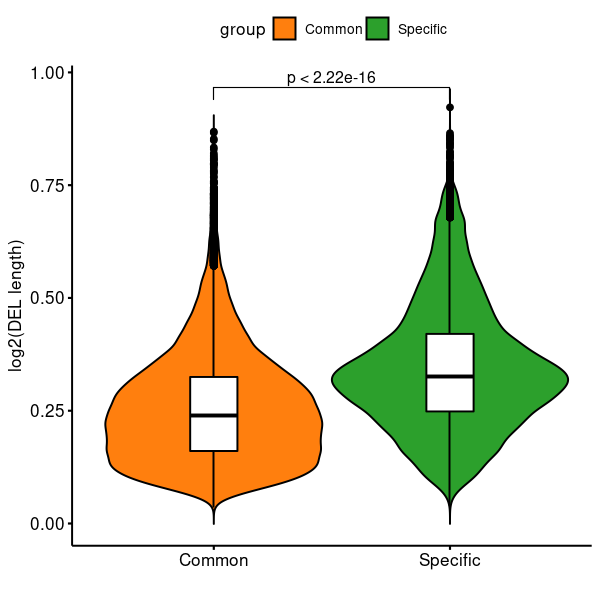

In [52]:
zs <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/ZS97_specific_peak.bed")
zs$peak <- sprintf("%s:%s-%s", zs$V1, zs$V2, zs$V3)
zs_tau <- read.table("/public/workspace202011/encode/zhutao/analysis/df/ZS97_all_tissues_peaks_TAU.csv",head=T,row.names=1)
zs_res <- merge(zs,zs_tau,by.x="peak",by.y=0,all.x=F)
zs_res$group <- "Specific"
mh <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/MH63_specific_peak.bed")
mh$peak <- sprintf("%s:%s-%s", mh$V1, mh$V2, mh$V3)
mh_tau <- read.table("/public/workspace202011/encode/zhutao/analysis/df/MH63_all_tissues_peaks_TAU.csv",head=T,row.names=1)
mh_res <- merge(mh,mh_tau,by.x="peak",by.y=0,all.x=F)
mh_res$group <- "Specific"
comm <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/111_NIP_MH63_ZS97.bed")
comm$peak <- sprintf("chr%s:%s-%s", comm$V1, comm$V2, comm$V3)
comm_tau <- read.table("/public/workspace202011/encode/zhutao/analysis/df/NIP_all_tissues_peaks_TAU.csv",head=T,row.names=1)
comm_res <- merge(comm,comm_tau,by.x="peak",by.y=0,all.x=F)
comm_res$group <- "Common"
nip <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/100_NIP.bed")
nip$peak <- sprintf("chr%s:%s-%s", nip$V1, nip$V2, nip$V3)
nip_tau <- read.table("/public/workspace202011/encode/zhutao/analysis/df/NIP_all_tissues_peaks_TAU.csv",head=T,row.names=1)
nip_res <- merge(nip,nip_tau,by.x="peak",by.y=0,all.x=F)
nip_res$group <- "Specific"
tau_res <- rbind(nip_res,mh_res,zs_res,comm_res) 
tau_res$group <- factor(tau_res$group, levels=c("Common","Specific"))
library(paletteer)
my_comparisons <- list(c("Common","Specific"))
p2 <- ggviolin(tau_res, "group", "tau", fill = "group",
   palette =paletteer_d("ggthemes::Classic_10")[2:3],
   add = "boxplot", add.params = list(fill = "white"))+stat_compare_means(comparisons = my_comparisons)+xlab("")+ylab("log2(DEL length)")
p2

# OCRs Annotation

In [31]:
library(org.Osativa.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(GenomicFeatures)

gff_file <- "/public/workspace202011/rice_encode/genome/oryza_sativa.gtf"
txdb <- makeTxDbFromGFF(gff_file)

peak <- readPeakFile("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/All_specific_Peaks.bed")
peakAnno <- annotatePeak(peak, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Osativa.eg.db")
df <- peakAnno@annoStat
df$Feature <- gsub("1st Exon","Exon",df$Feature)
df$Feature <- gsub("Other Exon","Exon",df$Feature)
df$Feature <- gsub("1st Intron","Intron",df$Feature)
df$Feature <- gsub("Other Intron","Intron",df$Feature)
df$Feature <- gsub("Downstream (<=300)","Downstream (<=300 bp)",df$Feature)
nip_coord<- aggregate(df$Frequency, by=list(Category=df$Feature), FUN=sum)
nip_coord$group <- "Specific peaks"
nip_coord

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



>> preparing features information...		 2023-04-14 05:25:51 PM 
>> identifying nearest features...		 2023-04-14 05:25:51 PM 
>> calculating distance from peak to TSS...	 2023-04-14 05:25:52 PM 
>> assigning genomic annotation...		 2023-04-14 05:25:52 PM 
>> adding gene annotation...			 2023-04-14 05:25:58 PM 


Warning message in annotatePeak(peak, tssRegion = c(-3000, 3000), TxDb = txdb, annoDb = "org.Osativa.eg.db"):
“Unknown ID type, gene annotation will not be added...”


>> assigning chromosome lengths			 2023-04-14 05:25:58 PM 
>> done...					 2023-04-14 05:25:58 PM 


Category,x,group
<chr>,<dbl>,<chr>
3' UTR,1.0172027,Specific peaks
5' UTR,0.0398903,Specific peaks
Distal Intergenic,46.9209673,Specific peaks
Downstream (<=300),3.5602094,Specific peaks
Exon,0.9174769,Specific peaks
Intron,1.3512840,Specific peaks
Promoter (<=1kb),24.0737971,Specific peaks
Promoter (1-2kb),12.6601845,Specific peaks
Promoter (2-3kb),9.4589878,Specific peaks


In [27]:
library(org.Osativa.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(GenomicFeatures)

gff_file <- "/public/workspace202011/rice_encode/genome/oryza_sativa.gtf"
txdb <- makeTxDbFromGFF(gff_file)

peak <- readPeakFile("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/overlap/sets/peak_types/111_NIP_MH63_ZS97.bed")
peakAnno <- annotatePeak(peak, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Osativa.eg.db")
df <- peakAnno@annoStat
df$Feature <- gsub("1st Exon","Exon",df$Feature)
df$Feature <- gsub("Other Exon","Exon",df$Feature)
df$Feature <- gsub("1st Intron","Intron",df$Feature)
df$Feature <- gsub("Other Intron","Intron",df$Feature)
df$Feature <- gsub("Downstream (<=300)","Downstream (<=300 bp)",df$Feature)
common <- aggregate(df$Frequency, by=list(Category=df$Feature), FUN=sum)
common$group <- "Common peaks"
common

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



>> preparing features information...		 2023-04-14 05:23:50 PM 
>> identifying nearest features...		 2023-04-14 05:23:50 PM 
>> calculating distance from peak to TSS...	 2023-04-14 05:23:52 PM 
>> assigning genomic annotation...		 2023-04-14 05:23:52 PM 
>> adding gene annotation...			 2023-04-14 05:23:58 PM 


Warning message in annotatePeak(peak, tssRegion = c(-3000, 3000), TxDb = txdb, annoDb = "org.Osativa.eg.db"):
“Unknown ID type, gene annotation will not be added...”


>> assigning chromosome lengths			 2023-04-14 05:23:58 PM 
>> done...					 2023-04-14 05:23:58 PM 


Category,x,group
<chr>,<dbl>,<chr>
3' UTR,1.87940228,Common peaks
5' UTR,0.01810282,Common peaks
Distal Intergenic,20.14844316,Common peaks
Downstream (<=300),3.80653018,Common peaks
Exon,0.76854717,Common peaks
Intron,0.79652426,Common peaks
Promoter (<=1kb),48.61431111,Common peaks
Promoter (1-2kb),13.74991771,Common peaks
Promoter (2-3kb),10.21822132,Common peaks


In [32]:
anno_res <- rbind(nip_coord, common)
anno_res$Category <- factor(anno_res$Category, levels=rev(c("Distal Intergenic","Promoter (<=1kb)","Promoter (1-2kb)","Promoter (2-3kb)","Downstream (<=300)","Intron","3' UTR","Exon","5' UTR")))
anno_res$group <- factor(anno_res$group, levels=c("Common peaks","Specific peaks"))
anno_res

Category,x,group
<fct>,<dbl>,<fct>
3' UTR,1.01720269,Specific peaks
5' UTR,0.03989030,Specific peaks
Distal Intergenic,46.92096734,Specific peaks
Downstream (<=300),3.56020942,Specific peaks
Exon,0.91747694,Specific peaks
Intron,1.35128397,Specific peaks
Promoter (<=1kb),24.07379706,Specific peaks
Promoter (1-2kb),12.66018449,Specific peaks
Promoter (2-3kb),9.45898778,Specific peaks


Coordinate system already present. Adding new coordinate system, which will replace the existing one.



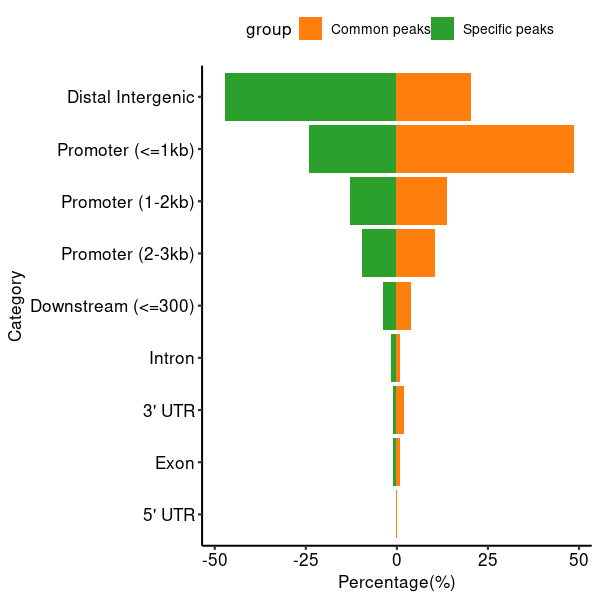

In [34]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 100)
p13 <- ggplot(anno_res,aes(x=Category, y = ifelse(group == "Common peaks", x, -x), fill=group))+ 
  geom_bar(stat="identity", position="identity")+
  scale_y_continuous(limits = c(-max(anno_res$x), max(anno_res$x))) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))+
  scale_fill_manual(values=paletteer_d("ggthemes::Classic_10")[2:3])+
  coord_flip()+theme_pubr()+ylab("Percentage(%)")
p13

# Compare JSD score across the variaties

In [1]:
triadpos <- data.frame(NIP=c(1,0,0,0,0.5,0.5,0.33), MH63=c(0,1,0,0.5,0,0.5,0.33),ZS97=c(0,0,1,0.5,0.5,0,0.33))
rownames(triadpos) <- c("NIP dominant","MH63 dominant","ZS97 dominant", "NIP suppressed","MH63 suppressed","ZS97 suppressed","Balanced")
triadpos

,NIP,MH63,ZS97
,<dbl>,<dbl>,<dbl>
NIP dominant,1.00,0.00,0.00
MH63 dominant,0.00,1.00,0.00
ZS97 dominant,0.00,0.00,1.00
NIP suppressed,0.00,0.50,0.50
MH63 suppressed,0.50,0.00,0.50
ZS97 suppressed,0.50,0.50,0.00
Balanced,0.33,0.33,0.33


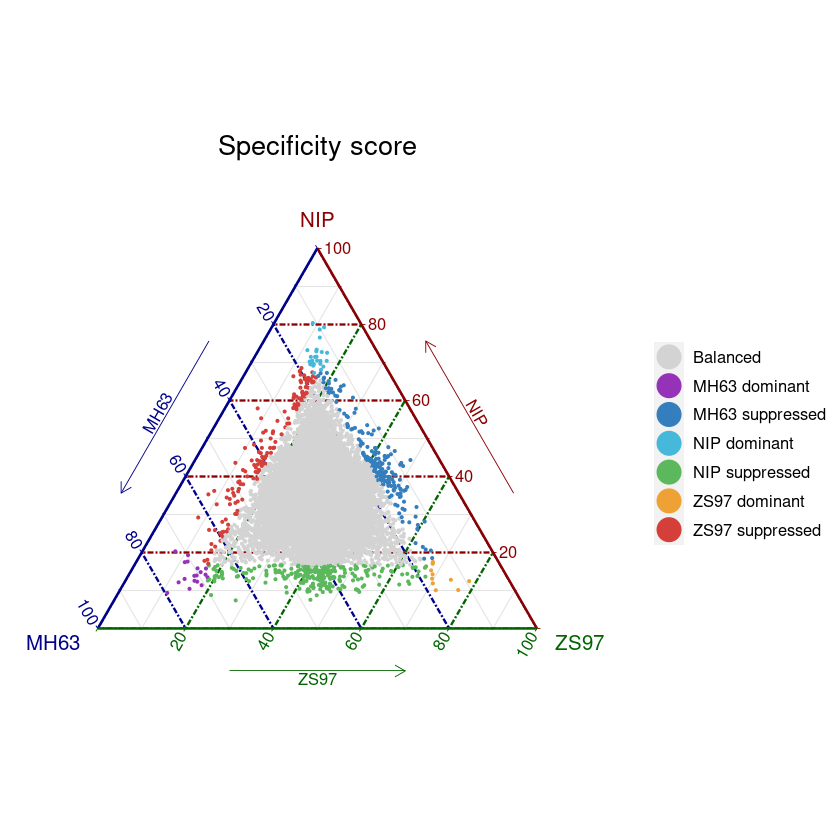

In [4]:
library(rdist)
library(pals)
library(tidyr)
library(ggtern)
library(paletteer)
all_tso <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/all_tso.csv",row.names=1,sep='\t',head=T)
am2 <- all_tso / rowSums(all_tso)
#colnames(am2) <- c("NIP","MH63","ZS97")
am2$group <- apply(am2, 1, function(x){
    rownames(triadpos)[which.min(cdist(t(x), triadpos))]
  })
triadcol <- setNames(brewer.dark2(8)[-7], rownames(triadpos))
triadcol['Balanced'] <- 'lightgrey'
p1 <- ggtern(data = am2, aes(MH63,NIP, ZS97, color=group)) +
           geom_point(size=0.1) + scale_color_manual(values=c("lightgrey",rev(paletteer_d("ggsci::default_locuszoom"))[2:7])) + ggtitle("Specificity score") + theme_rgbw() +
           theme(plot.title = element_text(hjust = 0.5,size = 16)) +
           guides(colour = guide_legend(override.aes = list(size=6))) +theme(legend.title=element_blank())
p1

# Compare the Chromatin Accessibility across Variaties

In [53]:
library(preprocessCore)
library(philentropy)
nip_quant <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/NIP_conserved_tissues_cpm.norm_new.csv",head=T, row.names=1,sep='\t')
mh_quant <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/MH63_conserved_tissues_cpm.norm_new.csv",head=T, row.names=1,sep='\t')
zs_quant <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/ZS97_conserved_tissues_cpm.norm_new.csv",head=T, row.names=1,sep='\t')
p_list <- list()
cols <- setNames(c("lightgrey",rev(paletteer_d("ggsci::default_locuszoom"))[2:7]),c("Balanced","NIP dominant","MH63 dominant","ZS97 dominant","NIP suppressed","MH63 suppressed","ZS97 suppressed"))
for (i in c(1:22)){
    df_list <- list(nip_quant[i], mh_quant[i], zs_quant[i])
    final <- Reduce(merge, lapply(df_list, function(x) data.frame(x, peak = row.names(x))))
    rownames(final) <- final$peak
    df <- final[,c(2,3,4)]    
    sum <- rowSums(df)
    new <- sum[sum>=quantile(sum, 0.2, na.rm=TRUE)]
    new_df <- df[rownames(df) %in% names(new),]
    final_peak <- as.data.frame(normalize.quantiles(as.matrix(new_df)))
    rownames(final_peak) <- rownames(new_df)
    colnames(final_peak) <- colnames(new_df)
    df2 <- final_peak / rowSums(final_peak)
    colnames(df2) <- c("NIP","MH63","ZS97")
    tissue <- sub("NIP_", "", colnames(df)[1])
    df2$group <- apply(df2, 1, function(x){
    rownames(triadpos)[which.min(cdist(t(x), triadpos))]})                             
    p_list[[i]] <- ggtern(data = df2, aes(MH63,NIP, ZS97, color=group)) +
           geom_point(size=0.3) + scale_color_manual(values=cols) + ggtitle(tissue) + theme_rgbw() +
           theme(plot.title = element_text(hjust = 0.5,size = 16), legend.background=element_rect(fill = alpha("white", 0))) +
           guides(colour = guide_legend(override.aes = list(size=6)))
    #write.table(df2, sprintf("/public/workspace202011/encode/zhutao/analysis/Figure/Fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/%s_quant.df",tissue)
    #                 ,sep="\t", quote=F)
}


Attaching package: ‘philentropy’


The following object is masked from ‘package:GenomicFeatures’:

    distance


The following object is masked from ‘package:GenomicRanges’:

    distance


The following object is masked from ‘package:IRanges’:

    distance




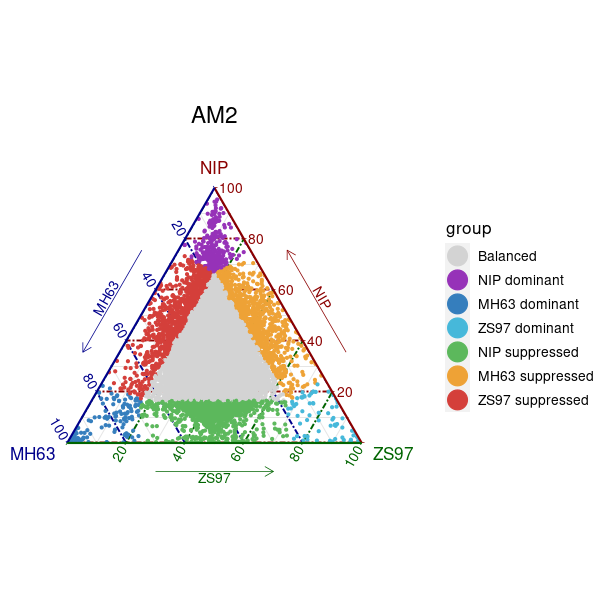

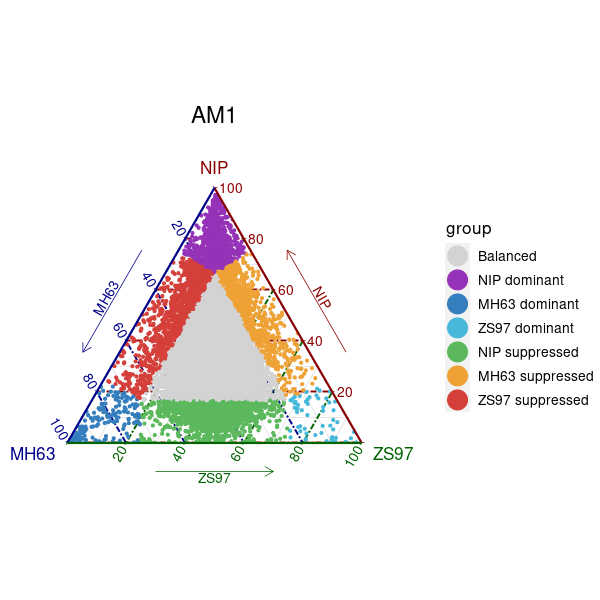

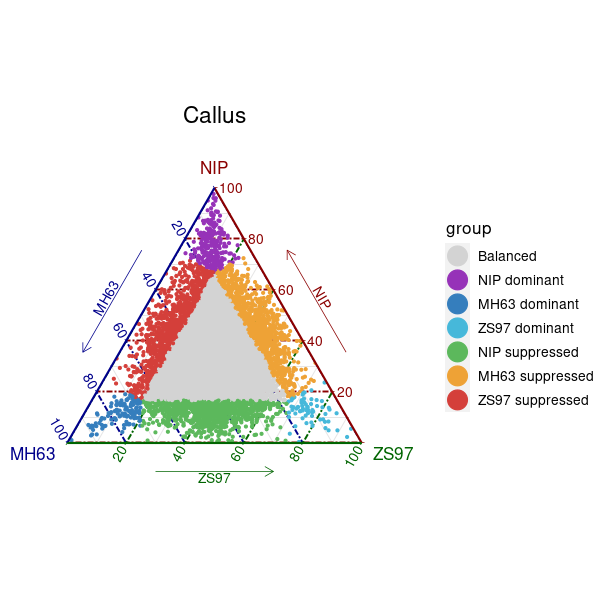

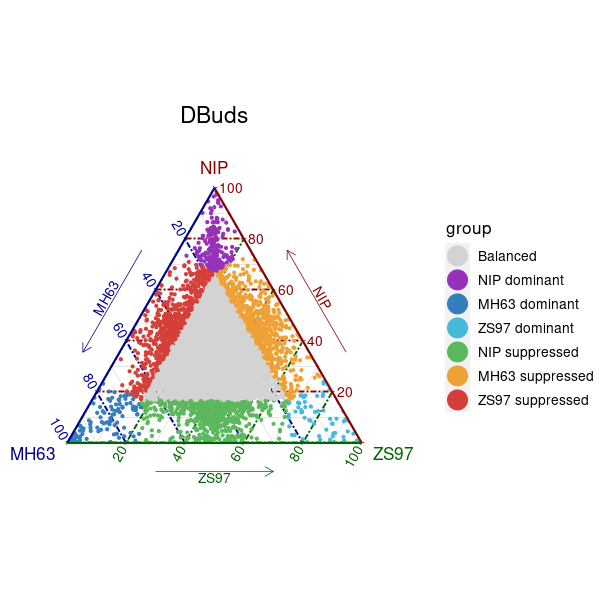

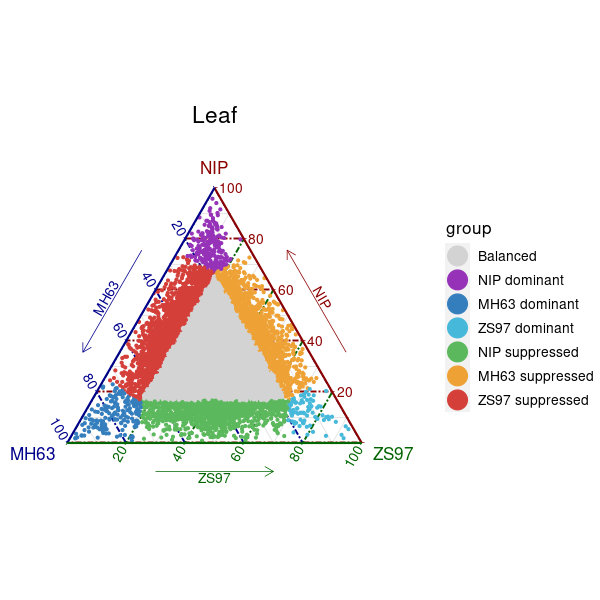

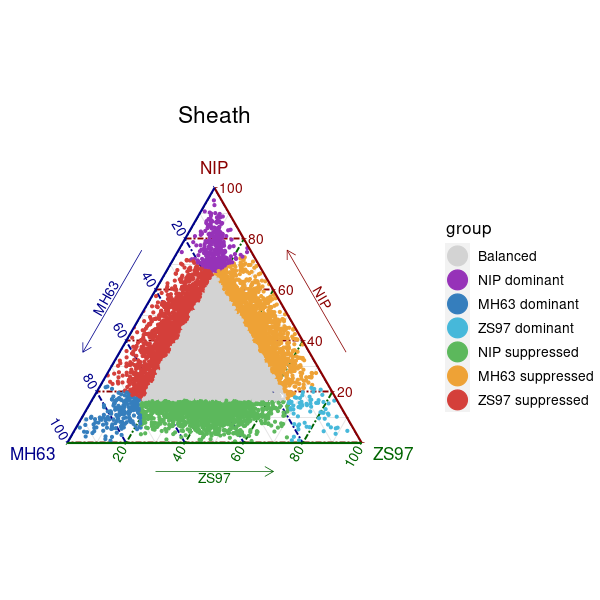

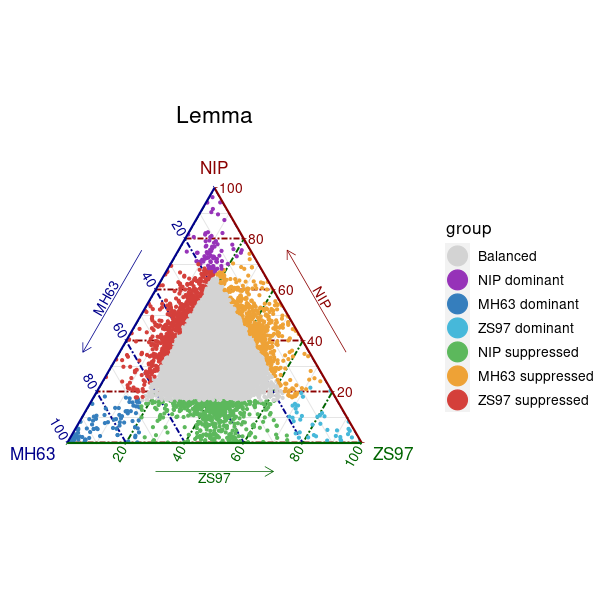

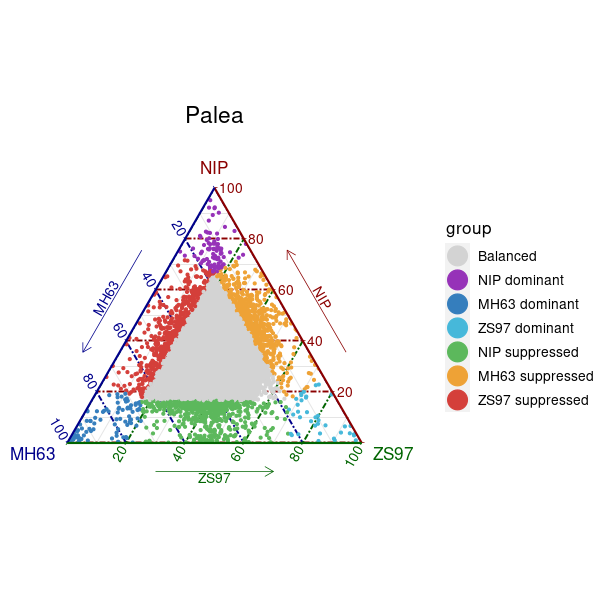

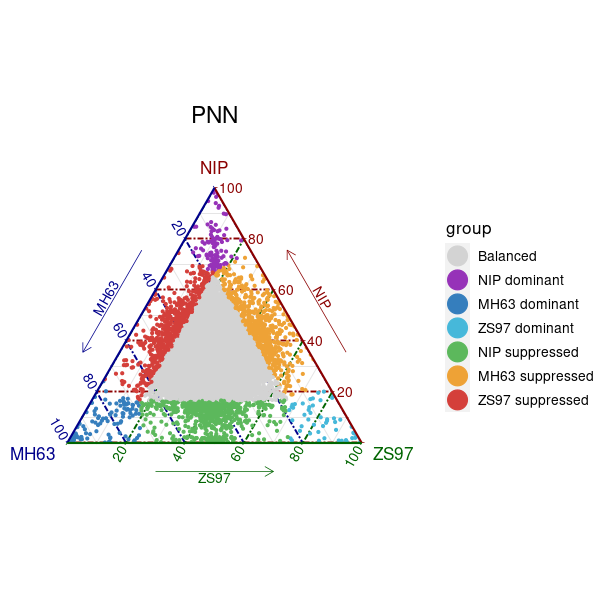

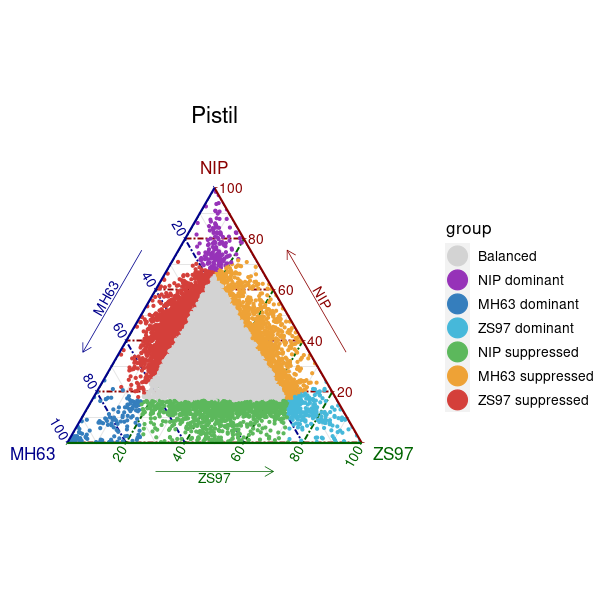

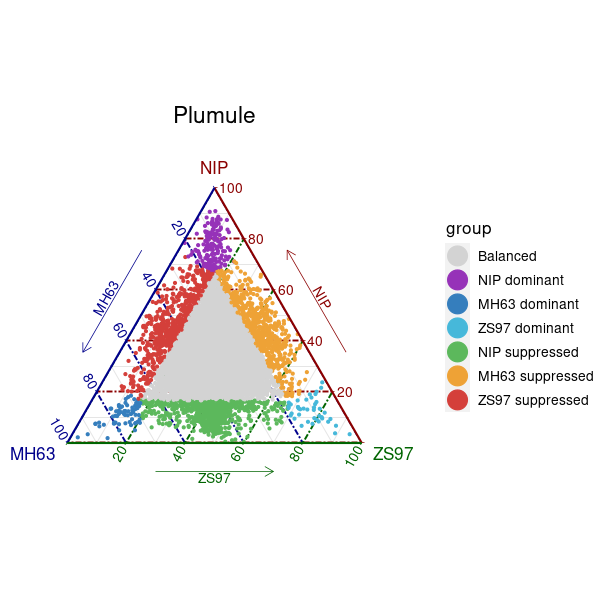

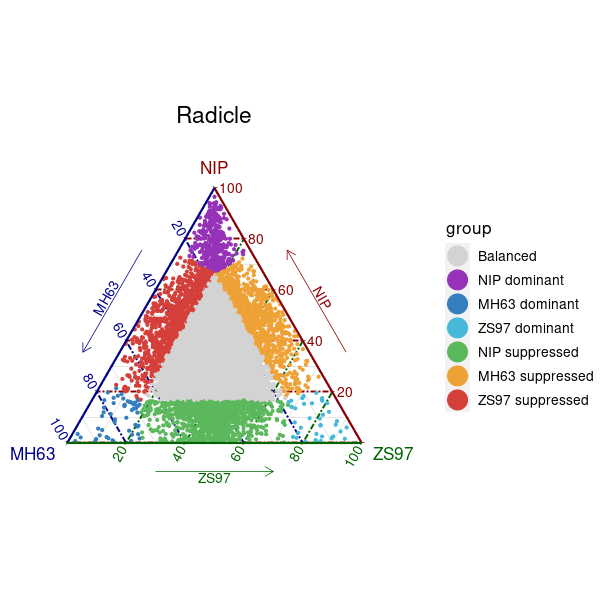

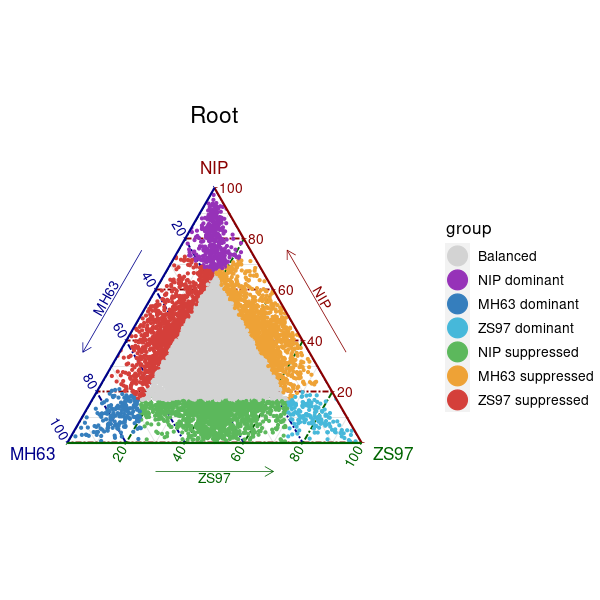

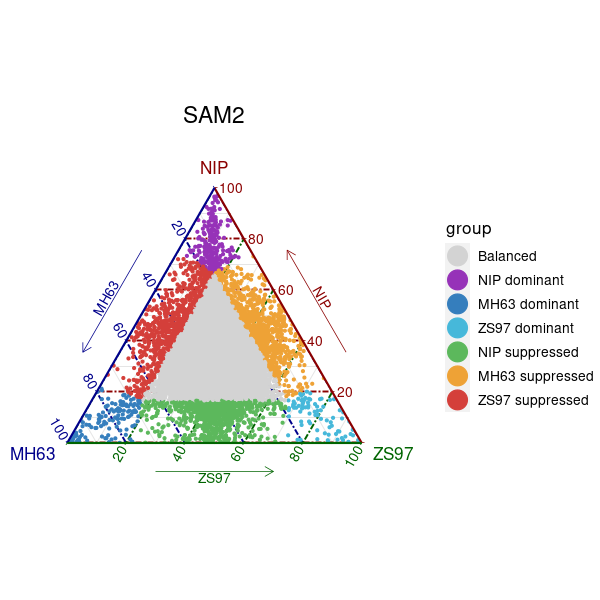

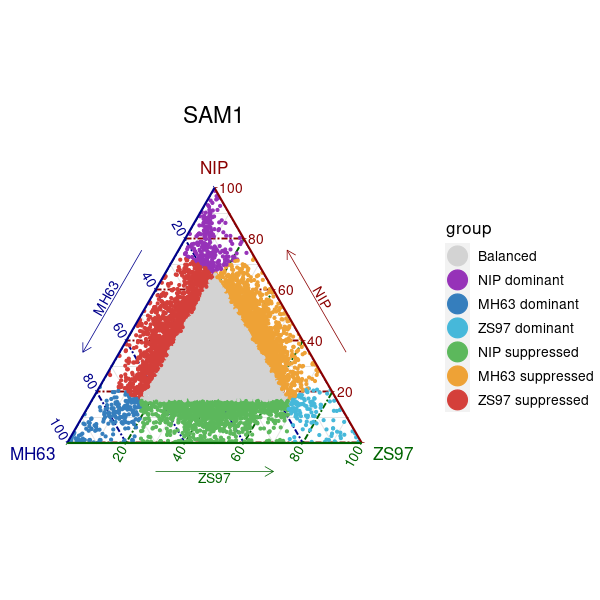

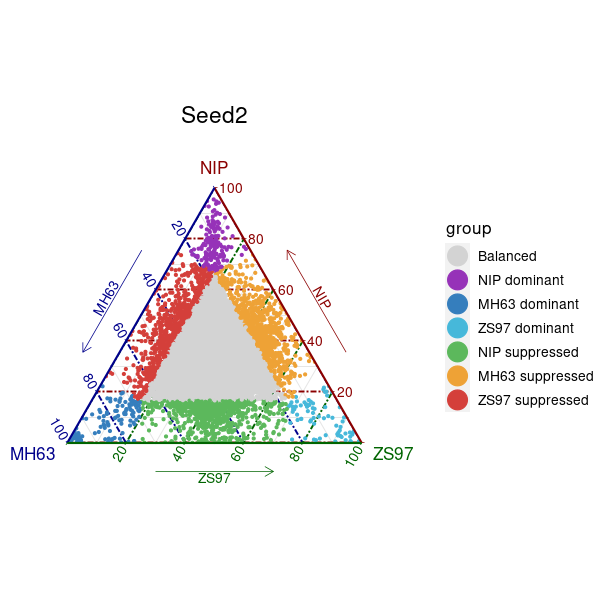

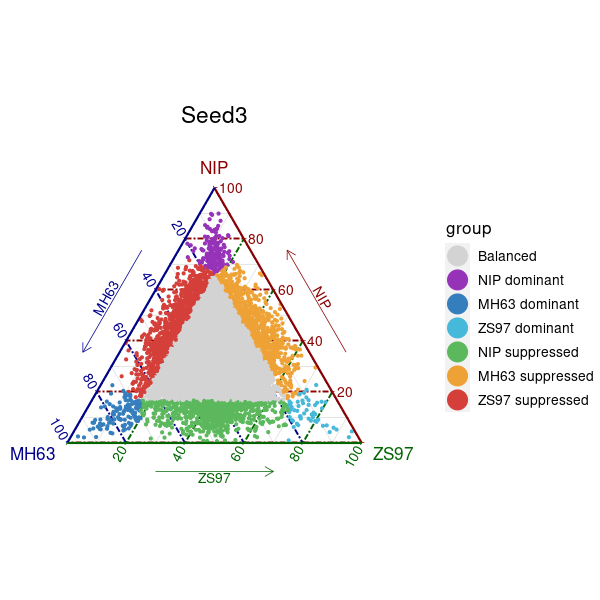

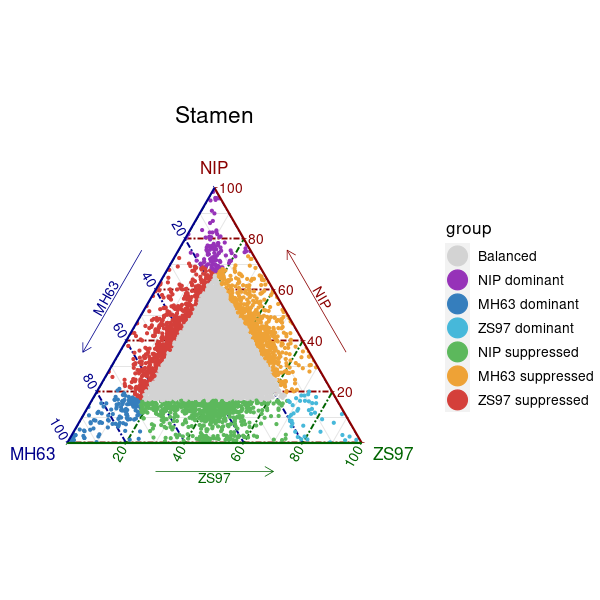

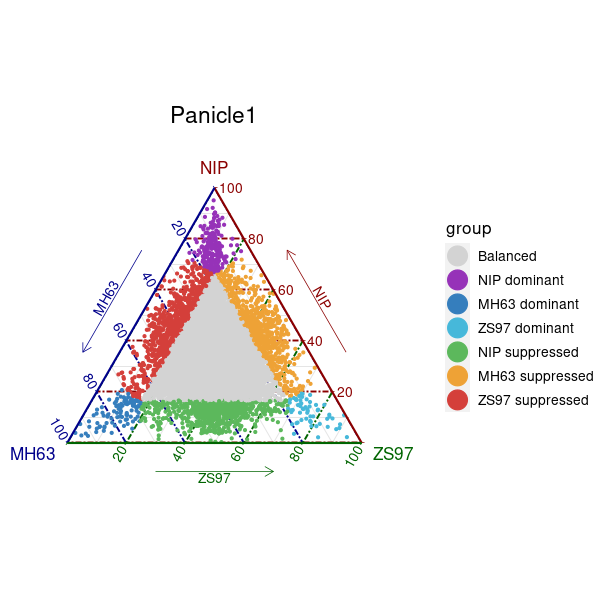

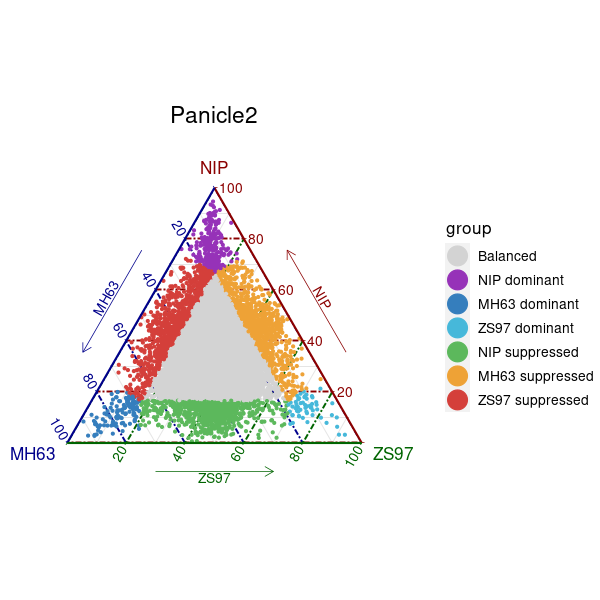

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]

[[17]]

[[18]]

[[19]]

[[20]]

[[21]]

[[22]]


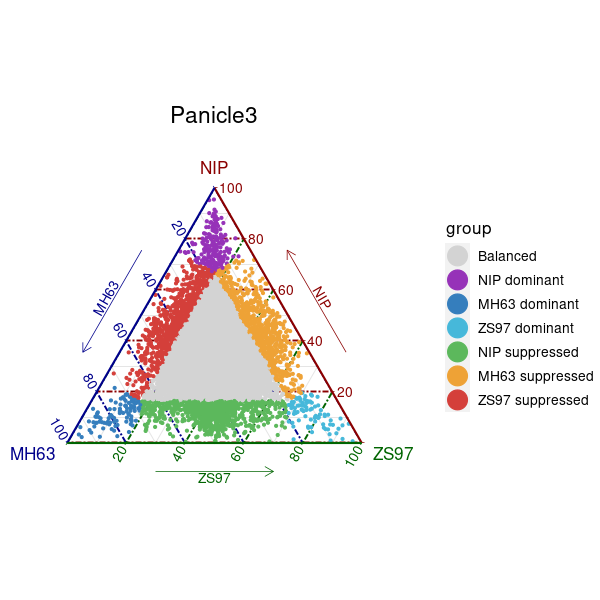

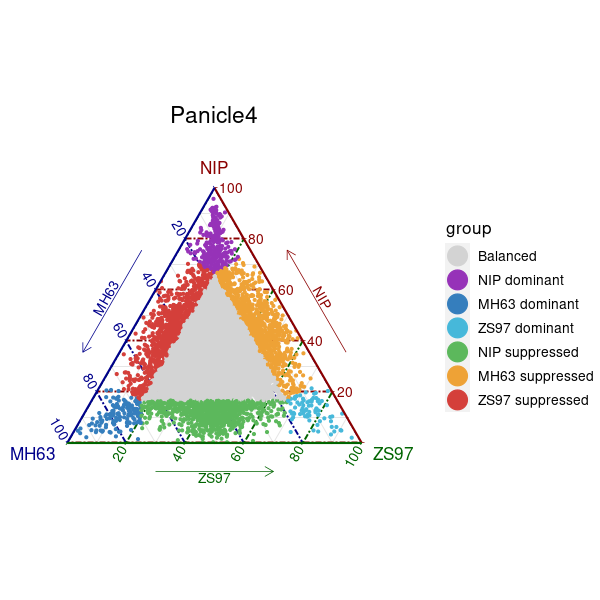

In [56]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 100)
p_list

Using percent as value column.  Use the value argument to cast to override this choice



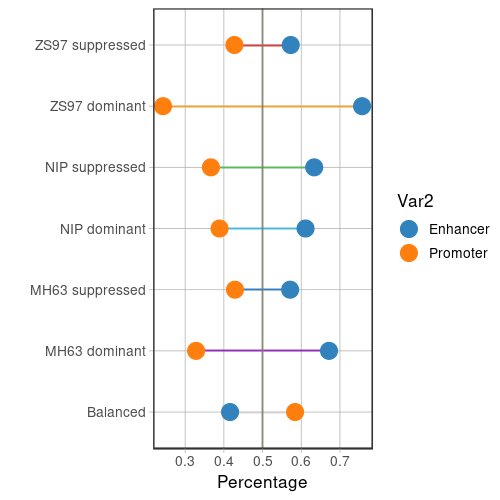

In [7]:
library(dplyr)
df <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/AM2_quant.df",sep="\t")
df$peak <- sapply(strsplit(rownames(df),"\\|"), `[`, 1)
type <- read.table("/public/workspace202011/rice_encode/works/NIP.merged.type")
type$peak <- sprintf("%s:%s-%s",type$V1,type$V2, type$V3)
type <- type[,c(5,6)]
type$V5 <- ifelse(type$V5=="distal","Enhancer", "Promoter")
res <- merge(df, type, by="peak",all=F)
library(data.table)
a <- data.frame(table(res$group,res$V5))%>% group_by(Var1) %>%
  mutate(percent = Freq/sum(Freq)) 
library(reshape)
library(ggpubr)
df <- cast(a, Var1 ~ Var2)
cols <- setNames(c("lightgrey",rev(paletteer_d("ggsci::default_locuszoom"))[2:7]),c("Balanced","NIP dominant","MH63 dominant","ZS97 dominant","NIP suppressed","MH63 suppressed","ZS97 suppressed"))
#options(repr.plot.width = 4, repr.plot.height = 5, repr.plot.res = 100)
pro <- a %>%
  filter(Var2 == "Promoter")
Enh <- a %>%
  filter(Var2 == "Enhancer")
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 100)
ggplot(a)+
geom_segment(data=pro, aes(x=percent, xend=Enh$percent, y=Var1, yend=Enh$Var1), color=cols) +
  
  geom_point(aes(x = percent, y = Var1, color = Var2), size = 5, show.legend = TRUE) +
  ylab("") +
  xlab("Percentage")+theme_bw()+theme(
    plot.title = element_text(face = "bold", size = 12),
    axis.ticks = element_line(colour = "grey70", size = 0.2),
    panel.grid.major = element_line(colour = "grey70", size = 0.2),
    panel.grid.minor = element_blank())+scale_color_manual(values = c("#3182BD","#FF7F0E"))+
    geom_vline(xintercept = 0.5, color = "#80796B", linetype = "solid",  size = .5, alpha = .8)

In [ ]:
lst <- list()
for (i in Sys.glob("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/*_quant.df")){
    df <- read.table(i,sep="\t")
    df$peak <- sapply(strsplit(rownames(df),"\\|"), `[`, 1)
    type <- read.table("/public/workspace202011/rice_encode/works/NIP.merged.type")
    type$peak <- sprintf("%s:%s-%s",type$V1,type$V2, type$V3)
    type <- type[,c(5,6)]
    type$V5 <- ifelse(type$V5=="distal","Enhancer", "Promoter")
    res <- merge(df, type, by="peak",all=F)
    library(data.table)
    a <- data.frame(table(res$group,res$V5))%>% group_by(Var1) %>%
      mutate(percent = Freq/sum(Freq)) 
    library(reshape)
    library(ggpubr)
    df <- cast(a, Var1 ~ Var2)
    cols <- setNames(c("lightgrey",rev(paletteer_d("ggsci::default_locuszoom"))[2:7]),c("Balanced","NIP dominant","MH63 dominant","ZS97 dominant","NIP suppressed","MH63 suppressed","ZS97 suppressed"))
    #options(repr.plot.width = 4, repr.plot.height = 5, repr.plot.res = 100)
    pro <- a %>%
      filter(Var2 == "Promoter")
    Enh <- a %>%
      filter(Var2 == "Enhancer")
    options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 100)
    lst[[i]] <- ggplot(a)+
    geom_segment(data=pro, aes(x=percent, xend=Enh$percent, y=Var1, yend=Enh$Var1), color=cols) +

      geom_point(aes(x = percent, y = Var1, color = Var2), size = 5, show.legend = TRUE) +
      ylab("") +
      xlab("Percentage")+theme_bw()+theme(
        plot.title = element_text(face = "bold", size = 12),
        axis.ticks = element_line(colour = "grey70", size = 0.2),
        panel.grid.major = element_line(colour = "grey70", size = 0.2),
        panel.grid.minor = element_blank())+scale_color_manual(values = c("#3182BD","#FF7F0E"))+
        geom_vline(xintercept = 0.5, color = "#80796B", linetype = "solid",  size = .5, alpha = .8)+ggtitle(gsub("_quant.df","",basename(i)))
    }

# Balanced, Unbalanced SNPs density

In [8]:
bal <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/NIP_MH_ZS_Balanced_All_Tissues_NIP_peak_SNP_Num.bed")
bal$length <- bal$V3 - bal$V2
bal$V4 <- as.numeric(gsub("\\.",0,bal$V4))
bal$density <- bal$V4/ bal$length
bal$group <- "Balanced"
head(bal)

,V1,V2,V3,V4,length,density,group
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<chr>
1,1,12553,13989,5,1436,0.003481894,Balanced
2,1,16207,16945,2,738,0.002710027,Balanced
3,1,26931,27590,1,659,0.001517451,Balanced
4,1,35440,36154,2,714,0.002801120,Balanced
5,1,61856,63179,2,1323,0.001511716,Balanced
6,1,72598,73867,2,1269,0.001576044,Balanced


In [9]:
non <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/NIP_MH_ZS_NonBalanced_NIP_peak_SNP_Num.bed")
non$length <- non$V3 - non$V2
non$V4 <- as.numeric(gsub("\\.",0,non$V4))
non$density <- non$V4/ non$length
non$group <- "NonBalance"

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



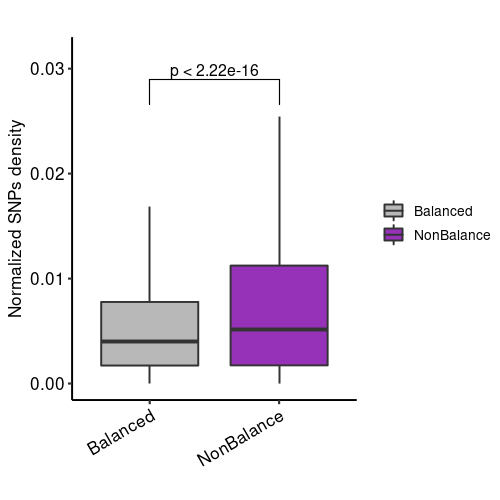

In [10]:
library(ggpubr)
my_comparisons <- list(c("Balanced","NonBalance"))
p2 <- ggplot(rbind(bal,non), aes(x=group, , y=density, fill=group)) +
          geom_boxplot(outlier.shape = NA) +scale_fill_manual(values= rev(paletteer_d("ggsci::default_locuszoom")))+theme_pubr()+
          ylab('Normalized SNPs density') +xlab("") +theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust=1)) +
          theme(legend.title = element_blank())+ggtitle("") + theme(legend.position='right') +theme(plot.title = element_text(hjust = 0.5))+
          stat_compare_means(comparisons = my_comparisons,label.y = c(0.025)) +coord_cartesian(ylim = quantile(rbind(bal,non)$density, na.rm = T, c(0, 0.99)))
p2

# Genotype Analysis

In [ ]:
## (base) [encode@node5 top80_quantile]$ ls *_quant.df|sed 's/_quant.df//g'|while read i; do cat ${i}_quant.df|grep -v "group"|sed 's/|/\t/g'|sed 's/ /_/g'|cut -f1,7|sed 's/:/\t/g'|sed 's/-/\t/g'|bedtools intersect -wa -wb -a - -b /mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/fimo/1e-3/fimo_motif.bed -F 1|cut -f1-4|awk '!seen[$1,$2,$3,$4]++'|bedtools intersect -wa -wb -a - -b /mnt/public2/zhutao/encode/encode_related/figure/fig7/snp/nip_mh_zs_genotype.txt >motif_snp/${i}_peak_motif_snp_e5.bed; done

In [11]:
motif <- read.table("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/motif_snp/AM1_peak_motif_snp.bed")
motif$type <- ifelse(grepl("NIP",motif$V4),"NIP",ifelse(grepl("MH63",motif$V4),"MH63",ifelse(grepl("ZS97",motif$V4),"ZS97","Balanced")))
library(dplyr)
motif$peak <- sprintf("%s_%s_%s",motif$V1,motif$V2,motif$V3)
motif <- motif[motif$V13 !="SAME",]
motif_balance <- motif[motif$type=="NIP",]
#res <- data.frame(table(motif_balance$peak, motif_balance$V13))%>% group_by(Var1) %>% mutate(percent=Freq/sum(Freq)) 
data.frame(table(motif_balance$V13)) %>% mutate(percent=Freq/sum(Freq))

Var1,Freq,percent
<fct>,<int>,<dbl>
MH63_ZS97,10248,0.4699839
NIP_MH63,6555,0.3006191
NIP_ZS97,5002,0.2293969


In [12]:
final <- list()
for (t in Sys.glob("/mnt/public2/zhutao/encode/encode_related/figure/fig5/merged_peaks_analysis/conserved_quant/peak_type/top80_quantile/motif_snp/*_peak_motif_snp.bed")){
    tissue <- gsub("_peak_motif_snp.bed","",basename(t))
    motif <- read.table(t)
    motif$type <- ifelse(grepl("NIP",motif$V4),"NIP",ifelse(grepl("MH63",motif$V4),"MH63",ifelse(grepl("ZS97",motif$V4),"ZS97","Balanced")))
    library(dplyr)
    motif$peak <- sprintf("%s_%s_%s",motif$V1,motif$V2,motif$V3)
    motif <- motif[motif$V13 !="SAME",]
    lst <- list()
    for (i in unique(motif$type)){
        motif_balance <- motif[motif$type==i,]
        lst[[i]] <- data.frame(table(motif_balance$V13)) %>% mutate(percent=Freq/sum(Freq))%>% mutate(group=i) %>% mutate(tissue=tissue)
        #res <- data.frame(table(motif_balance$peak, motif_balance$V13))%>% group_by(Var1) %>% top_n(1, Freq)
        #lst[[i]] <- data.frame(table(res$Var2)) %>% mutate(percent=Freq/sum(Freq)) %>% mutate(group=i) %>% mutate(tissue=tissue)
    }
    final[[t]] <- bind_rows(lst)
}

In [13]:
all <- bind_rows(final)
all <- all[all$Var1=="MH63_ZS97" & all$group=="NIP"|all$Var1=="NIP_MH63" & all$group=="ZS97" |
          all$Var1=="NIP_ZS97" & all$group=="MH63"|all$group=="Balanced",]
head(all)

,Var1,Freq,percent,group,tissue
,<fct>,<int>,<dbl>,<chr>,<chr>
1,MH63_ZS97,73223,0.4367820,Balanced,AM1
2,NIP_MH63,51662,0.3081686,Balanced,AM1
3,NIP_ZS97,42757,0.2550495,Balanced,AM1
4,MH63_ZS97,10248,0.4699839,NIP,AM1
9,NIP_ZS97,2677,0.2983727,MH63,AM1
11,NIP_MH63,3226,0.3300593,ZS97,AM1


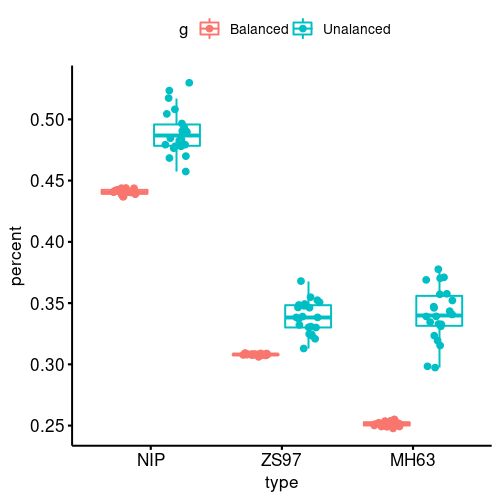

In [14]:
all_bal <- all[all$group=="Balanced",]
all_bal$type <- rep(c("NIP","ZS97","MH63"),22)
all_nonbal <- all[all$group!="Balanced",]
all_nonbal$type <- all_nonbal$group
aa <- rbind(all_bal,all_nonbal)
aa$g <- ifelse(aa$group=="Balanced","Balanced","Unalanced")
p3 <- ggboxplot(aa, x = "type", y = "percent", color = "g", 
          add = "jitter")
p3

In [19]:
library(rstatix)
stat.test <- aa %>%
  group_by(type) %>%
  t_test(percent ~ g) %>%
  adjust_pvalue(method = "bonferroni") %>%
  add_significance("p.adj")%>% add_xy_position(x = "dose")
stat.test


Attaching package: ‘rstatix’


The following object is masked from ‘package:ggtern’:

    mahalanobis_distance


The following object is masked from ‘package:stats’:

    filter




type,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif,y.position,groups,xmin,xmax
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<named list>,<dbl>,<dbl>
MH63,percent,Balanced,Unalanced,22,22,-19.06237,21.32465,7.07e-15,2.121e-14,****,0.411,"Balanced , Unalanced",NA,NA
NIP,percent,Balanced,Unalanced,22,22,-12.64451,21.56604,1.91e-11,5.730e-11,****,0.563,"Balanced , Unalanced",NA,NA
ZS97,percent,Balanced,Unalanced,22,22,-10.76666,21.13351,4.87e-10,1.461e-09,****,0.401,"Balanced , Unalanced",NA,NA


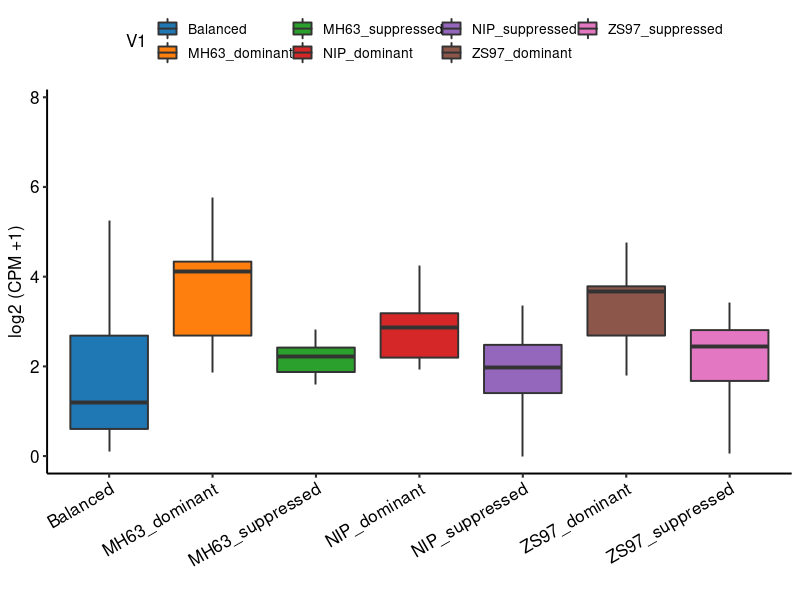

In [21]:
chip <- read.table("/public/workspace202011/encode/zhutao/ATACorrect/nip_mh_zs_bindetect/Leaf_NIP_ChIP_Enrichment_f0.2_new.txt")
chip <- chip[chip$V3 < 0.05 ,]
library(ggplot2)
library(ggpubr)
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 100)
ggplot(chip, aes(x=V1, y=log2(V4+1), fill=V1)) +
          geom_boxplot(outlier.shape = NA)+theme_pubr() +
          scale_fill_manual(values= paletteer_d("ggthemes::Classic_10"))+
          ylab('log2 (CPM +1)') +xlab("") +theme(axis.text.x = element_text(angle = 30, vjust = 1, hjust=1))

Picking joint bandwidth of 0.412



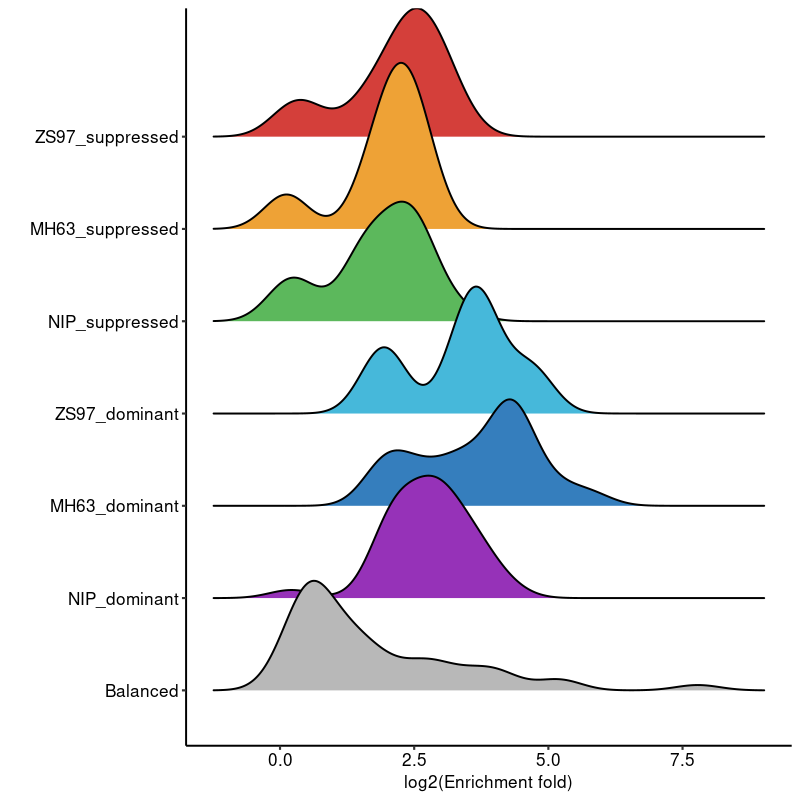

In [22]:
library(ggridges)
library(ggpubr)
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 100)
chip$V1 <- factor(chip$V1, levels = c("Balanced","NIP_dominant","MH63_dominant","ZS97_dominant","NIP_suppressed","MH63_suppressed","ZS97_suppressed"))
p4 <- ggplot(chip, aes(x = log2(V4+1), y = V1,fill=V1)) +
  geom_density_ridges()+theme_pubr()+scale_fill_manual(values= rev(paletteer_d("ggsci::default_locuszoom")))+
  xlab("log2(Enrichment fold)") + ylab("") + guides(fill="none")
p4

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


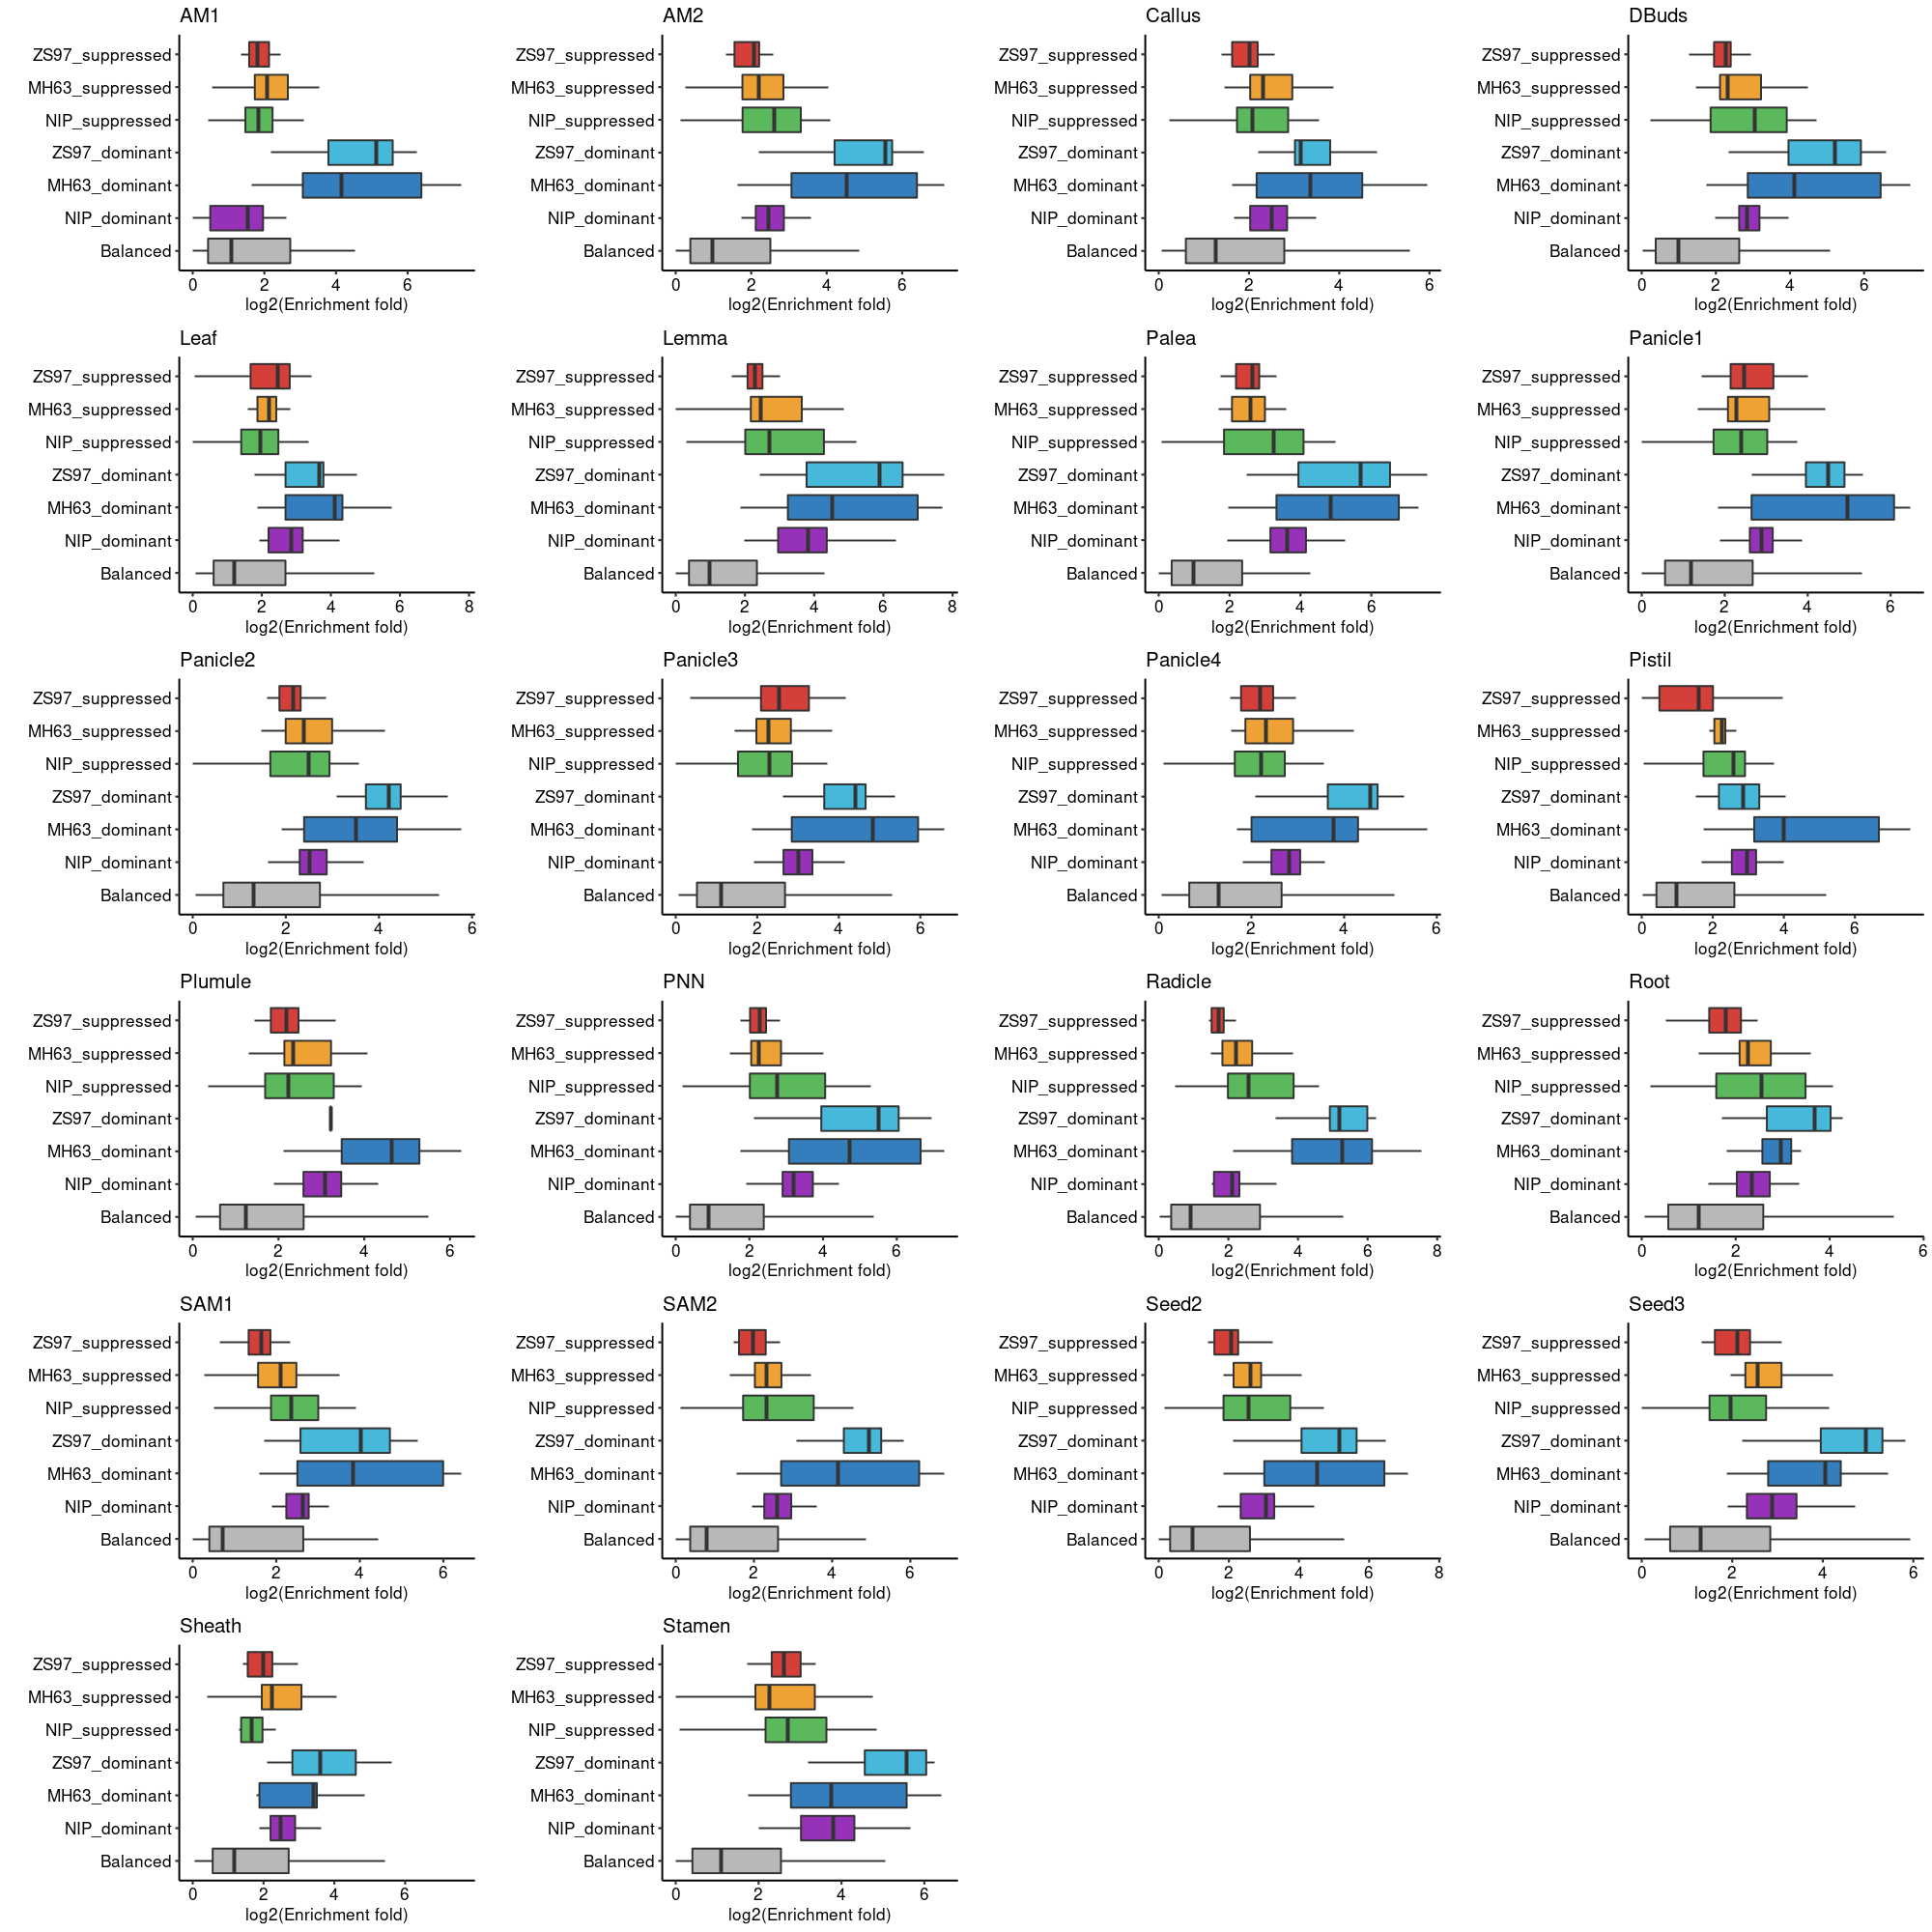

In [23]:
chip <- read.table("/public/workspace202011/encode/zhutao/ATACorrect/nip_mh_zs_bindetect/tf_chip_enrichment/Peak_Type_ChIP_Enrichment_f0.2_all_tissue.txt")
plot_list <- list()
for (i in unique(chip$V1)){
    temp <- chip[chip$V1==i,]
    temp <- temp[temp$V4 < 0.05 ,]
    temp$V2 <- factor(temp$V2, levels = c("Balanced","NIP_dominant","MH63_dominant","ZS97_dominant","NIP_suppressed","MH63_suppressed","ZS97_suppressed"))
    plot_list[[i]] <- ggplot(temp, aes(x = log2(V5+1), y = V2,fill=V2)) +
     geom_boxplot(outlier.shape = NA)+theme_pubr()+scale_fill_manual(values= rev(paletteer_d("ggsci::default_locuszoom")))+
    xlab("log2(Enrichment fold)") + ylab("") + guides(fill="none")+ggtitle(i)
}

options(repr.plot.width =20 , repr.plot.height = 20, repr.plot.res = 100)
ggarrange(plotlist=plot_list,nrow=6,ncol=4,align = c("hv"))